In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy.linalg as LA
import scipy.io

from skimage import img_as_float
from tqdm import tqdm_notebook

## T1

In [2]:
def gaussian_eq(x, mean, var):
    return np.diagonal(np.exp(-0.5 * (x - mean).dot(np.linalg.inv(var)).dot((x - mean).T))
                       / np.sqrt(2*np.pi * np.linalg.det(var)))

def soft_em(data, k, means, iters):
    # Initialize step
    m = np.array([1/k] * k, dtype=float)
    var = np.array([np.identity(2) for i in range(k)], dtype=float)
    
    for it in range(iters):
        # Expectation
        w = np.zeros((data.shape[0], k))
        for j in range(k):
            w[:, j] = gaussian_eq(data, means[j], var[j]) * m[j]
        w = np.divide(w, np.sum(w, axis=1)[:, None])
        
        # Maximization
        for j in range(k):
            m[j] = w[:, j].sum() / data.shape[0]
            var_j = np.zeros((2, 2))
            for i in range(data.shape[0]):
                var_j += w[i, j] * (data[i] - mean[j]).T.dot(data[i] - mean[j])
            var_j /= np.sum(w[:, j])
            var_j[0, 1] = var_j[1, 0] = 0
            var[j] = var_j
            mean[j] = np.sum(data * w[:, j].reshape(-1, 1)) / np.sum(w[:, j])
            
        # Display Result
        print("Iteration: ", it)
        print("w: ", w)
        print("m: ", m)
        print("Cov: ", var)
        print("\n", "="*50, "\n")
    return w

In [3]:
data_x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
data_y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.array([data_x, data_y]).T
data

array([[ 1,  2],
       [ 3,  3],
       [ 2,  2],
       [ 8,  8],
       [ 6,  6],
       [ 7,  7],
       [-3, -3],
       [-2, -4],
       [-7, -7]])

In [4]:
mean_x = np.array([3, 2, -3])
mean_y = np.array([3, 2, -3])
mean = np.array([mean_x, mean_y]).T
mean

array([[ 3,  3],
       [ 2,  2],
       [-3, -3]])

In [5]:
w = soft_em(data, 3, mean, 3)

Iteration:  0
w:  [[1.19202922e-01 8.80797076e-01 1.81545808e-09]
 [7.31058579e-01 2.68941421e-01 1.69570706e-16]
 [2.68941421e-01 7.31058579e-01 1.01529005e-11]
 [9.99983299e-01 1.67014218e-05 2.03105874e-42]
 [9.99088949e-01 9.11051194e-04 5.37528453e-32]
 [9.99876605e-01 1.23394576e-04 3.30529272e-37]
 [2.31952283e-16 1.38879439e-11 1.00000000e+00]
 [2.31952283e-16 1.38879439e-11 1.00000000e+00]
 [3.30570063e-37 5.90009054e-29 1.00000000e+00]]
m:  [0.45757242 0.20909425 0.33333333]
Cov:  [[[24.55293548  0.        ]
  [ 0.         24.55293548]]

 [[ 0.77328542  0.        ]
  [ 0.          0.77328542]]

 [[11.33333335  0.        ]
  [ 0.         11.33333335]]]


Iteration:  1
w:  [[4.19395510e-02 9.57161798e-01 8.98651358e-04]
 [5.05955731e-03 9.94937945e-01 2.49794320e-06]
 [9.18771589e-03 9.90754462e-01 5.78225470e-05]
 [1.00000000e+00 1.90667375e-13 3.52704929e-10]
 [9.99645793e-01 3.54072158e-04 1.34732744e-07]
 [9.99999964e-01 2.87538099e-08 7.23021595e-09]
 [1.95938980e-03 5.037

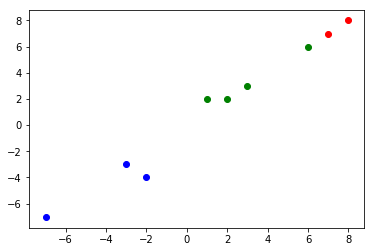

In [6]:
clusters = [[] for i in range(w.shape[1])]
for i, row in enumerate(w):
    clusters[np.argmax(row)].append(data[i])
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=["red", "green", "blue"][i])
plt.show()

# The face database

In [7]:
x = scipy.io.loadmat("facedata.mat")

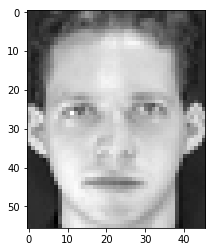

In [8]:
plt.imshow(x['facedata'][0, 0], cmap="gray")
plt.show()

In [9]:
xf = {}
for i in range(x['facedata'].shape[0]):
    for j in range(x['facedata'].shape[1]):
        xf[i, j] = img_as_float(x['facedata'][i, j])

In [10]:
def mat_to_vec(m):
    return m.reshape(1, -1)
def euclidean_dist(t, d):
    return np.sqrt(np.sum((t - d)**2))

In [11]:
euclidean_dist(mat_to_vec(xf[0, 0]), mat_to_vec(xf[0, 1]))

10.037616294165492

In [12]:
euclidean_dist(mat_to_vec(xf[0, 0]), mat_to_vec(xf[1, 0]))

8.173295099737281

## T6

In [13]:
def similar_mat(T, D):
    A = np.zeros((T.shape[0], D.shape[0]))
    for i, t in enumerate(T):
        for j, d in enumerate(D):
            A[i, j] = euclidean_dist(t, d)
    return A

In [14]:
T = []
D = []
for i in range(40):
    for j in range(3):
        T.append(xf[i, j])
    for j in range(3, 10):
        D.append(xf[i, j])
T = np.array(T)
D = np.array(D)

T_v = np.array([mat_to_vec(t)[0] for t in T])
D_v = np.array([mat_to_vec(d)[0] for d in D])

A = similar_mat(T_v, D_v)

In [15]:
T.shape

(120, 56, 46)

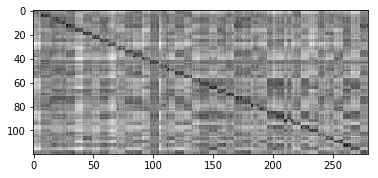

In [16]:
plt.imshow(A, cmap="gray")
plt.show()

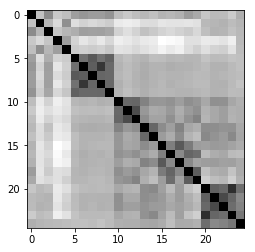

In [17]:
tmp_vec = []
for i in range(5):
    for j in range(5):
        tmp_vec.append(xf[i, j])
tmp_vec = np.array(tmp_vec)
A_tmp = similar_mat(tmp_vec, tmp_vec)

plt.imshow(A_tmp, cmap="gray")
plt.show()

## T7

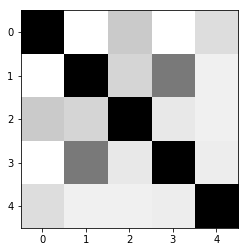

In [18]:
plt.imshow(A_tmp[5:10, 5:10], cmap="gray")
plt.show()

## T8

In [19]:
def report_predict(A, t):
    tp = fp = tn = fn = 0
    for j in range(A.shape[1]):
        for i in range(0, A.shape[0], 3):
            dist = np.min(A[i:i+3, j])
            j_person = j // 7
            i_person = i // 3
            predict = 1.0 if dist < t else 0.0
            if predict == 1.0 and i_person == j_person:
                tp += 1
            elif predict == 1.0 and i_person != j_person:
                fp += 1
            elif predict == 0.0 and i_person == j_person:
                fn += 1
            elif predict == 0.0 and i_person != j_person:
                tn += 1
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return np.array([tpr, fpr])

In [20]:
report_predict(A, 10)

array([0.99642857, 0.45641026])

In [21]:
report_predict(A, 6.703135)

array([0.73928571, 0.00677656])

## T9 & T10

In [22]:
def t9t10_roc(A, start, end, amount):
    t_range = np.linspace(start, end, amount)
    roc = np.array([report_predict(A, t) for t in tqdm_notebook(t_range)])
    # Show Result
    plt.plot(roc[:, 1], roc[:, 0])
    plt.title("RoC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    # Finding Recall at 0.1% false alarm rate
    recall = roc[(roc[:, 1] >= 0.00095) & (roc[:, 1] <= 0.00105)][0][0]
    print("At 0.1% FPR, Recall is", recall)
    # Finding EER
    eer = roc[np.abs(roc[:, 1] - 1 + roc[:, 0]) <= 0.001][0]
    print(f"EER is at TPR = {eer[0]} and FPR = {eer[1]}")
    return roc

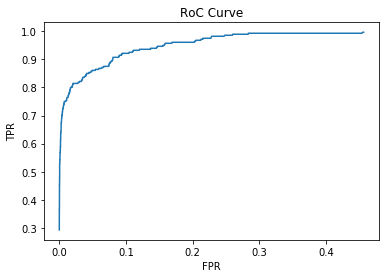

At 0.1% FPR, Recall is 0.5428571428571428
EER is at TPR = 0.9107142857142857 and FPR = 0.0891941391941392


In [23]:
roc_no_proj = t9t10_roc(A, 5, 10, 2000)

## T11

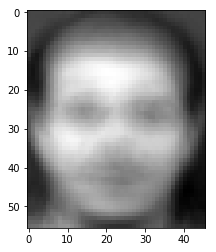

In [24]:
T_v_mean = T_v.mean(axis=0)

plt.imshow(T_v_mean.reshape(56, 46), cmap="gray")
plt.show()

In [25]:
X = T_v.T
X_caret = X - T_v_mean.reshape(-1, 1)
D_caret = D_v.T - T_v_mean.reshape(-1, 1)

## T12

In [26]:
print(f"Size of covariance matrix is {len(T_v_mean)} x {len(T_v_mean)}")
print(f"Rank is at most {T_v.shape[0] - 1}")

Size of covariance matrix is 2576 x 2576
Rank is at most 119


In [27]:
print(f"Gram matrix size is {X_caret.shape[1]} x {X_caret.shape[1]}")

Gram matrix size is 120 x 120


## T13

## T14

## T15

In [28]:
gram_mat = X_caret.T.dot(X_caret)
eigen_val, eigen_vec = np.linalg.eigh(gram_mat)

In [29]:
# Just a bubble sort
for i in range(eigen_val.shape[0] - 1):
    for j in range(eigen_val.shape[0] - 1 - i):
        if eigen_val[j] < eigen_val[j + 1]:
            eigen_val[j], eigen_val[j + 1] = eigen_val[j + 1], eigen_val[j]
            eigen_vec[:, j], eigen_vec[:, j + 1] = eigen_vec[:, j + 1].copy(), eigen_vec[:, j].copy()

## T16

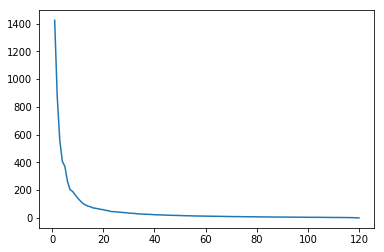

In [30]:
plt.plot(np.linspace(1, eigen_val.shape[0], eigen_val.shape[0]), eigen_val)
plt.show()

In [31]:
total_var = eigen_val.sum()
print("Total Variance = ", total_var)
for i, val in enumerate(np.cumsum(eigen_val)):
    if val >= 0.95 * total_var:
        eigen_amount = i + 1
        break
print(f"We should take {eigen_amount} eigenvector")

Total Variance =  6853.796339741124
We should take 64 eigenvector


In [32]:
eigen_val[0]

1423.9297148381538

In [33]:
eigen_vec[:, 0]

array([ 0.07820028,  0.15633363,  0.14076739,  0.05252672,  0.04456795,
        0.05947934,  0.00433108, -0.00255776,  0.01244094, -0.00516036,
        0.00058608,  0.01542051,  0.06282245,  0.06517672,  0.05535185,
       -0.05125934, -0.05261287, -0.04488465, -0.04346462, -0.04604713,
       -0.03374528,  0.00069813,  0.00106809,  0.02591401, -0.07070941,
       -0.05857396, -0.05789584, -0.13916408, -0.13042557, -0.12187151,
       -0.04518949, -0.0277502 , -0.00406905,  0.1192507 ,  0.07330844,
        0.08149413,  0.13175873,  0.13219306,  0.14226821,  0.10898309,
        0.10041008,  0.10620114,  0.01395625, -0.0220718 ,  0.00821777,
        0.03118031,  0.04287925,  0.06350818,  0.055345  ,  0.02281523,
       -0.01964227,  0.11240647,  0.10502066,  0.11515175,  0.12304385,
        0.13458668,  0.15827715, -0.13946718, -0.14658911, -0.12993531,
       -0.10389307, -0.11204893, -0.1217176 , -0.08503461, -0.06637081,
       -0.09016727, -0.06992988, -0.07120533, -0.10444925, -0.04

In [34]:
vp = X_caret.dot(eigen_vec)
for i in range(vp.shape[1]):
    vp[:, i] /= np.linalg.norm(vp[:, i])

## T17

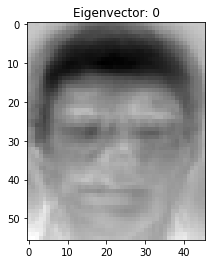

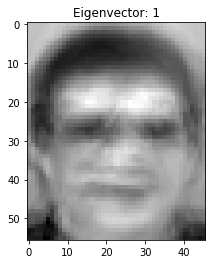

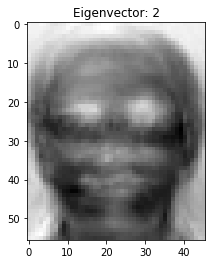

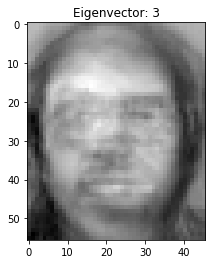

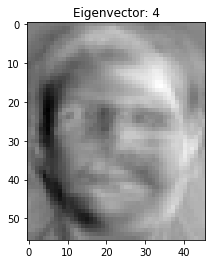

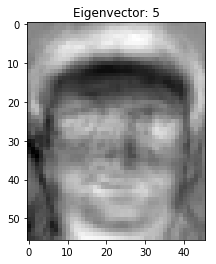

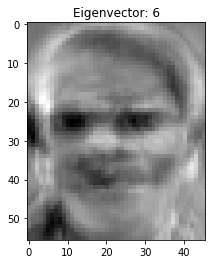

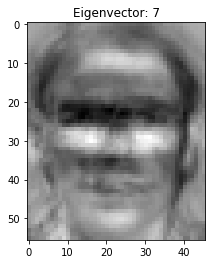

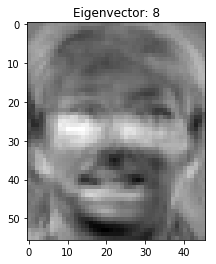

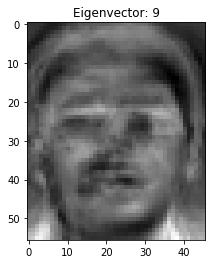

In [35]:
for i in range(10):
    plt.title(f"Eigenvector: {i}")
    plt.imshow(-vp[:, i].reshape(56, 46), cmap="gray")
    plt.show()

## T19 & T20

In [73]:
def proj_value(V, x_u, k):
    p = V.T.dot(x_u)
    p = p[:k, :]
    return p

def t19t20_work(k):
    T_p = proj_value(vp, X_caret, k)
    D_p = proj_value(vp, D_caret, k)
    A = similar_mat(T_p.T, D_p.T)
    return t9t10_roc(A, 5, 10, 1000)

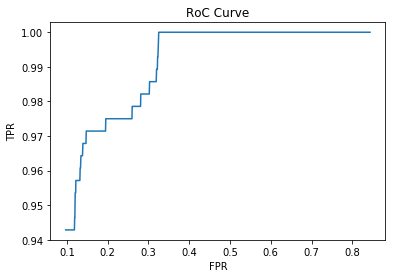

IndexError: index 0 is out of bounds for axis 0 with size 0

In [74]:
roc_pca = t19t20_work(10)

In [38]:
## T20 To be run

## T20

## T21

In [58]:
def cal_sw(T_p):
    sw = np.zeros((T_p.shape[0], T_p.shape[0]))
    for i in range(0, 120, 3):
        mean = T_p[:, i:i+3].mean(axis=1)
        for j in range(3):
            x_m_mean = T_p[:, i+j] - mean
            x_m_mean = x_m_mean.reshape(-1, 1)
            sw = sw + x_m_mean.dot(x_m_mean.T)
    return sw
def cal_sb(T_p):
    sb = np.zeros((T_p.shape[0], T_p.shape[0]))
    mean = T_p.mean(axis=1)
    print("G: ", mean)
    for i in range(0, 120, 3):
        mean_i = T_p[:, i:i+3].mean(axis=1).reshape(-1, 1)
        print(f"{i}: {mean_i}")
        diff = mean_i - mean
        sb = sb + diff.dot(diff.T)
    return sb

In [54]:
for i in range(1, 120):
    T_p = proj_value(vp, X_caret, i)
    sw = cal_sw(T_p)
    print(f"At k = {i}, rank of Sw is {np.linalg.matrix_rank(sw)}.")

At k = 1, rank of Sw is 1.
At k = 2, rank of Sw is 2.
At k = 3, rank of Sw is 3.
At k = 4, rank of Sw is 4.
At k = 5, rank of Sw is 5.
At k = 6, rank of Sw is 6.
At k = 7, rank of Sw is 7.
At k = 8, rank of Sw is 8.
At k = 9, rank of Sw is 9.
At k = 10, rank of Sw is 10.
At k = 11, rank of Sw is 11.
At k = 12, rank of Sw is 12.
At k = 13, rank of Sw is 13.
At k = 14, rank of Sw is 14.
At k = 15, rank of Sw is 15.
At k = 16, rank of Sw is 16.
At k = 17, rank of Sw is 17.
At k = 18, rank of Sw is 18.
At k = 19, rank of Sw is 19.
At k = 20, rank of Sw is 20.
At k = 21, rank of Sw is 21.
At k = 22, rank of Sw is 22.
At k = 23, rank of Sw is 23.
At k = 24, rank of Sw is 24.
At k = 25, rank of Sw is 25.
At k = 26, rank of Sw is 26.
At k = 27, rank of Sw is 27.
At k = 28, rank of Sw is 28.
At k = 29, rank of Sw is 29.
At k = 30, rank of Sw is 30.
At k = 31, rank of Sw is 31.
At k = 32, rank of Sw is 32.
At k = 33, rank of Sw is 33.
At k = 34, rank of Sw is 34.
At k = 35, rank of Sw is 35.
At 

## T22

In [59]:
T_p = proj_value(vp, X_caret, 80)
sw = cal_sw(T_p)
sb = cal_sb(T_p)

G:  [ 6.51330841e-16 -3.36027502e-15 -5.26985862e-15  4.01160586e-15
  3.84877315e-16 -1.30266168e-15 -2.07241631e-15 -3.55271368e-16
 -7.40148683e-16 -3.25665421e-16  7.84557604e-16  2.81256500e-16
  1.29526020e-15 -1.40998324e-15 -6.92039019e-16 -6.51330841e-16
  0.00000000e+00  1.11022302e-16 -6.29126381e-16  1.25825276e-16
  5.62512999e-16 -8.40068755e-16 -7.40148683e-16  7.84557604e-16
  5.47710025e-16  7.40148683e-17 -8.19714667e-16 -4.08932147e-16
 -8.30816897e-16 -1.11022302e-16  5.07001848e-16  4.42238838e-16
 -7.25345709e-16  1.59131967e-16  1.03620816e-15 -2.51650552e-16
 -1.33226763e-16  4.58892184e-16 -4.18184006e-16  1.70234197e-16
 -1.22124533e-16  3.55271368e-16 -9.25185854e-18  5.21804822e-16
  3.45094323e-16 -6.95739762e-16  6.40228611e-16 -1.85037171e-17
  8.23415410e-16  9.62193288e-17 -2.88657986e-16 -1.18423789e-16
 -1.48029737e-16  3.79326200e-17 -1.11022302e-16  2.12792746e-16
 -2.34997207e-16 -1.48954922e-16  8.23415410e-17  9.62193288e-17
  7.86407976e-17 -1.9

In [70]:
T_p[0, 119]

1.6585942980166115

In [43]:
lda_proj = LA.inv(sw).dot(sb)
lda_proj

array([[ 3.33710229e+08,  4.57344626e+07, -3.35286670e+07, ...,
         8.50440032e+05, -1.17059413e+06, -7.38875165e+05],
       [ 7.43939994e+07,  1.02189631e+07, -7.48001164e+06, ...,
         1.89629421e+05, -2.60926701e+05, -1.64753886e+05],
       [-8.54643393e+07, -1.17213221e+07,  8.62978382e+06, ...,
        -2.17816710e+05,  2.99891799e+05,  1.89287998e+05],
       ...,
       [ 1.47254951e+08,  2.01854114e+07, -1.47961510e+07, ...,
         3.75737809e+05, -5.16301136e+05, -3.26101294e+05],
       [-2.08565743e+08, -2.85799085e+07,  2.09619931e+07, ...,
        -5.31267813e+05,  7.32268330e+05,  4.61650033e+05],
       [-1.33650444e+08, -1.83206417e+07,  1.34324046e+07, ...,
        -3.40663535e+05,  4.68679085e+05,  2.96365763e+05]])

In [44]:
print("Is LDA Proj symmetric: ", all((lda_proj == lda_proj.T).reshape(-1)))

Is LDA Proj symmetric:  False


In [45]:
eigen_val, eigen_vec = LA.eig(lda_proj)
eigen_val = np.real(eigen_val)
eigen_vec = np.real(eigen_vec)
eigen_val[eigen_val < 1e-7] = 0
print(f"We have {eigen_val[eigen_val != 0].shape[0]} non-zero eigenvalues")

We have 39 non-zero eigenvalues


In [46]:
# Lazy to write sort function
idx = eigen_val.argsort()[::-1]   
eigen_val = eigen_val[idx]
eigen_vec = eigen_vec[:, idx]

In [47]:
eigen_val

array([1.09533995e+09, 3.94878248e+05, 1.15507694e+05, 5.98549882e+04,
       4.59575257e+04, 3.09746952e+04, 1.98441331e+04, 1.37525473e+04,
       1.01268049e+04, 8.52859931e+03, 6.13670691e+03, 5.78190894e+03,
       3.03142180e+03, 2.61312403e+03, 2.54665004e+03, 1.99433495e+03,
       1.86138864e+03, 1.38066515e+03, 1.14445310e+03, 1.00037068e+03,
       8.56506826e+02, 7.60017716e+02, 6.42168016e+02, 5.25753980e+02,
       4.51209259e+02, 3.83381793e+02, 3.58034929e+02, 3.27283088e+02,
       2.84735104e+02, 2.03013300e+02, 1.78182174e+02, 1.49628163e+02,
       1.29253377e+02, 1.20149104e+02, 8.69066079e+01, 6.34878845e+01,
       5.69820245e+01, 4.00969967e+01, 2.80081101e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

## T23

In [48]:
vp.shape

(2576, 120)

In [49]:
for i in range(39):
    eigen_vec[:, i] /= LA.norm(eigen_vec[:, i])

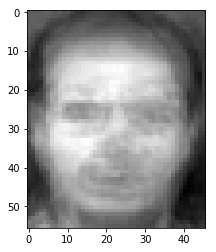

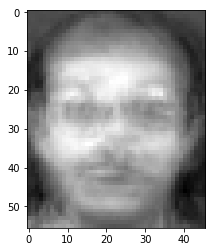

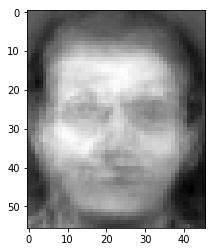

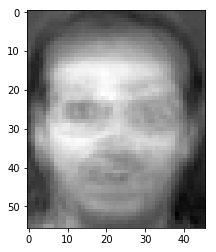

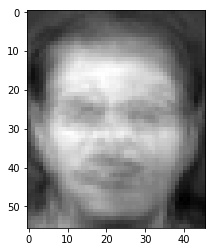

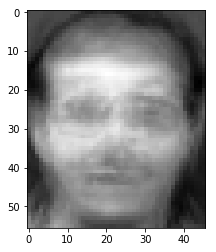

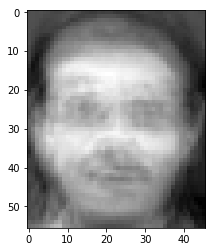

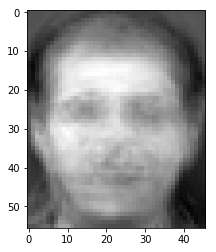

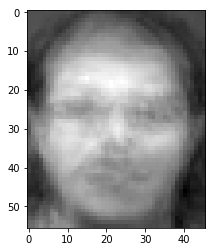

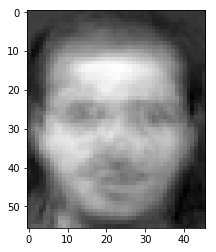

In [50]:
for i in range(10):
    vec = (vp[:, :80].dot(eigen_vec) + T_v_mean.reshape(-1, 1))[:, i]
    plt.imshow(vec.reshape(56, 46), cmap="gray")
    plt.show()

## T24

In [71]:
T_lda = eigen_vec.T.dot(T_p)[:39]
D_p = proj_value(vp, D_caret, 80)
D_lda = eigen_vec.T.dot(D_p)[:39]

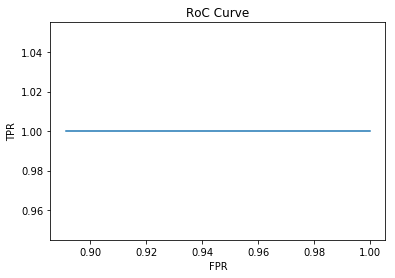

IndexError: index 0 is out of bounds for axis 0 with size 0

In [72]:
A = similar_mat(T_lda.T, D_lda.T)
roc_fisher = t9t10_roc(A, 5, 10, 1000)

## T25

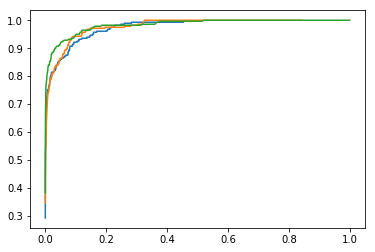

In [67]:
plt.plot(roc_no_proj[:, 1], roc_no_proj[:, 0])
plt.plot(roc_pca[:, 1], roc_pca[:, 0])
plt.plot(roc_fisher[:, 1], roc_fisher[:, 0])
plt.show()